In [2]:
# I had to reinstall dplyr with install.packages(dplyr)
library(Matrix);
library(dada2);

In [3]:
# AS160 was huge and deleted
path <- "~/fish/trimmed_reads" # CHANGE ME to the directory containing the fastq files after unzipping.
list.files(path)

[1] "AS100_S3_L001_R1_001.fastq"       "AS100_S3_L001_R2_001.fastq"      
  [3] "AS102_S50_L001_R1_001.fastq"      "AS102_S50_L001_R2_001.fastq"     
  [5] "AS103_S51_L001_R1_001.fastq"      "AS103_S51_L001_R2_001.fastq"     
  [7] "AS104_S52_L001_R1_001.fastq"      "AS104_S52_L001_R2_001.fastq"     
  [9] "AS105_S4_L001_R1_001.fastq"       "AS105_S4_L001_R2_001.fastq"      
 [11] "AS106_S5_L001_R1_001.fastq"       "AS106_S5_L001_R2_001.fastq"      
 [13] "AS107_S6_L001_R1_001.fastq"       "AS107_S6_L001_R2_001.fastq"      
 [15] "AS108_S7_L001_R1_001.fastq"       "AS108_S7_L001_R2_001.fastq"      
 [17] "AS109BC18_S152_L001_R1_001.fastq" "AS109BC18_S152_L001_R2_001.fastq"
 [19] "AS111_S9_L001_R1_001.fastq"       "AS111_S9_L001_R2_001.fastq"      
 [21] "AS112_S10_L001_R1_001.fastq"      "AS112_S10_L001_R2_001.fastq"     
 [23] "AS113_S11_L001_R1_001.fastq"      "AS113_S11_L001_R2_001.fastq"     
 [25] "AS114_S53_L001_R1_001.fastq"      "AS114_S53_L001_R2_001.fastq"     
 [27] "AS115_S54_L001_R1_001.fastq"      "AS115_S54_L001_R2_001.fastq"     
 [29] "AS117_S56_L001_R1_001.fastq"      "AS117_S56_L001_R2_001.fastq"     
 [31] "AS118BC19_S153_L001_R1_001.fastq" "AS118BC19_S153_L001_R2_001.fastq"
 [33] "AS119_S57_L001_R1_001.fastq"      "AS119_S57_L001_R2_001.fastq"     
 [35] "AS120_S58_L001_R1_001.fastq"      "AS120_S58_L001_R2_001.fastq"     
 [37] "AS121_S59_L001_R1_001.fastq"      "AS121_S59_L001_R2_001.fastq"     
 [39] "AS122_S12_L001_R1_001.fastq"      "AS122_S12_L001_R2_001.fastq"     
 [41] "AS123_S13_L001_R1_001.fastq"      "AS123_S13_L001_R2_001.fastq"     
 [43] "AS124_S14_L001_R1_001.fastq"      "AS124_S14_L001_R2_001.fastq"     
 [45] "AS125_S15_L001_R1_001.fastq"      "AS125_S15_L001_R2_001.fastq"     
 [47] "AS126BC20_S154_L001_R1_001.fastq" "AS126BC20_S154_L001_R2_001.fastq"
 [49] "AS127_S87_L001_R1_001.fastq"      "AS127_S87_L001_R2_001.fastq"     
 [51] "AS128_S88_L001_R1_001.fastq"      "AS128_S88_L001_R2_001.fastq"     
 [53] "AS129_S89_L001_R1_001.fastq"      "AS129_S89_L001_R2_001.fastq"     
 [55] "AS130_S90_L001_R1_001.fastq"      "AS130_S90_L001_R2_001.fastq"     
 [57] "AS131_S91_L001_R1_001.fastq"      "AS131_S91_L001_R2_001.fastq"     
 [59] "AS132_S92_L001_R1_001.fastq"      "AS132_S92_L001_R2_001.fastq"     
 [61] "AS133_S93_L001_R1_001.fastq"      "AS133_S93_L001_R2_001.fastq"     
 [63] "AS134_S94_L001_R1_001.fastq"      "AS134_S94_L001_R2_001.fastq"     
 [65] "AS135BC21_S155_L001_R1_001.fastq" "AS135BC21_S155_L001_R2_001.fastq"
 [67] "AS136_S43_L001_R1_001.fastq"      "AS136_S43_L001_R2_001.fastq"     
 [69] "AS137_S44_L001_R1_001.fastq"      "AS137_S44_L001_R2_001.fastq"     
 [71] "AS139_S17_L001_R1_001.fastq"      "AS139_S17_L001_R2_001.fastq"     
 [73] "AS140_S18_L001_R1_001.fastq"      "AS140_S18_L001_R2_001.fastq"     
 [75] "AS141_S95_L001_R1_001.fastq"      "AS141_S95_L001_R2_001.fastq"     
 [77] "AS142_S96_L001_R1_001.fastq"      "AS142_S96_L001_R2_001.fastq"     
 [79] "AS143_S83_L001_R1_001.fastq"      "AS143_S83_L001_R2_001.fastq"     
 [81] "AS144_S84_L001_R1_001.fastq"      "AS144_S84_L001_R2_001.fastq"     
 [83] "AS145_S85_L001_R1_001.fastq"      "AS145_S85_L001_R2_001.fastq"     
 [85] "AS146BC22_S156_L001_R1_001.fastq" "AS146BC22_S156_L001_R2_001.fastq"
 [87] "AS147BC23_S157_L001_R1_001.fastq" "AS147BC23_S157_L001_R2_001.fastq"
 [89] "AS148BC24_S158_L001_R1_001.fastq" "AS148BC24_S158_L001_R2_001.fastq"
 [91] "AS149_S38_L001_R1_001.fastq"      "AS149_S38_L001_R2_001.fastq"     
 [93] "AS150_S39_L001_R1_001.fastq"      "AS150_S39_L001_R2_001.fastq"     
 [95] "AS151_S40_L001_R1_001.fastq"      "AS151_S40_L001_R2_001.fastq"     
 [97] "AS152_S41_L001_R1_001.fastq"      "AS152_S41_L001_R2_001.fastq"     
 [99] "AS153_S42_L001_R1_001.fastq"      "AS153_S42_L001_R2_001.fastq"     
[101] "AS154_S43_L001_R1_001.fastq"      "AS154_S43_L001_R2_001.fastq"     
[103] "AS155_S44_L001_R1_001.fastq"      "AS155_S44_L001_R2_001.fastq"     
[105] "AS156_S45_L001_R1_001.fastq"      "AS156_S4

In [4]:
# Forward and reverse fastq filenames have format: SAMPLENAME_R1_001.fastq and SAMPLENAME_R2_001.fastq
fnFs <- sort(list.files(path, pattern="_R1_001.fastq", full.names = TRUE))
fnRs <- sort(list.files(path, pattern="_R2_001.fastq", full.names = TRUE))
# Extract sample names, assuming filenames have format: SAMPLENAME_XXX.fastq
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)

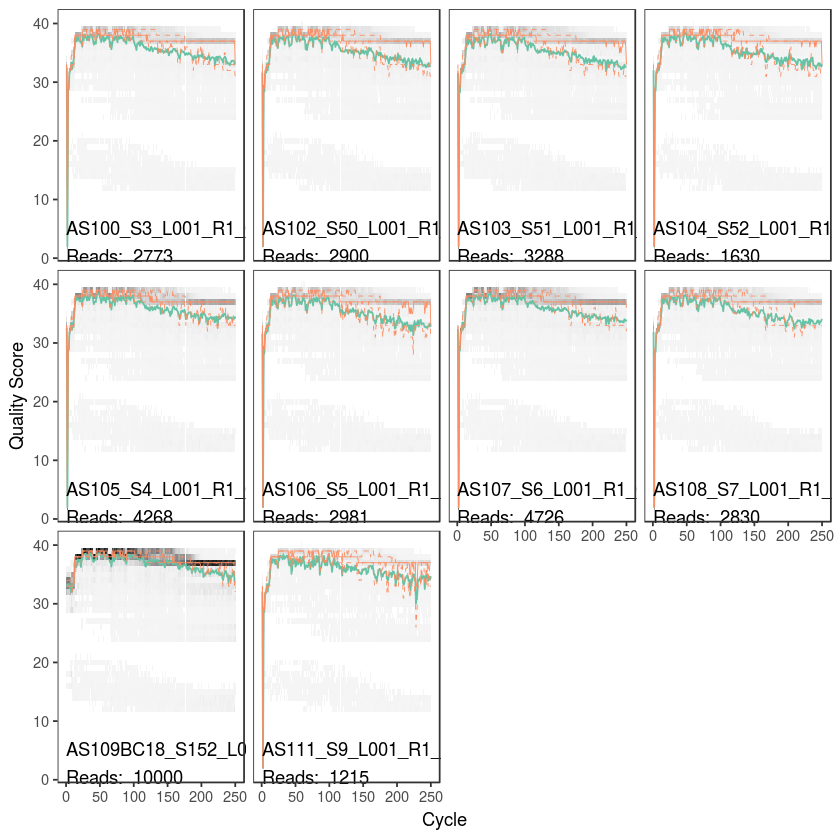

In [5]:
plotQualityProfile(fnFs[1:10])

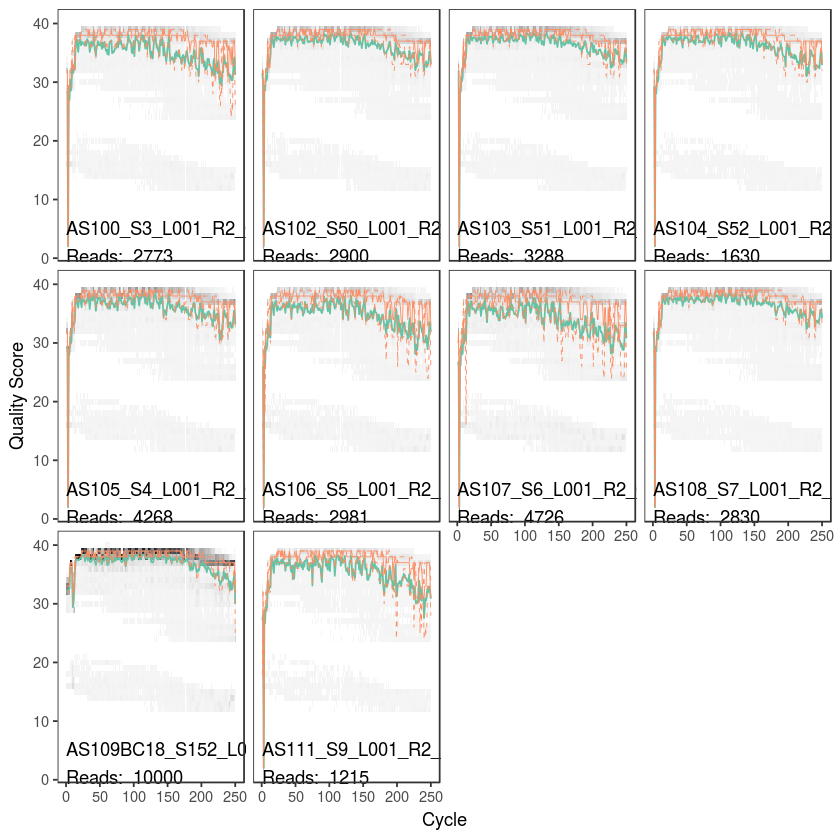

In [6]:
plotQualityProfile(fnRs[1:10])

In [7]:
# Place filtered files in filtered/ subdirectory
filtFs <- file.path(path, "filtered", paste0(sample.names, "_F_filt.fastq.gz"))
filtRs <- file.path(path, "filtered", paste0(sample.names, "_R_filt.fastq.gz"))

In [8]:
out <- filterAndTrim(fnFs, filtFs, fnRs, filtRs, truncLen=c(150,150),
              maxN=0, maxEE=c(2,2), truncQ=10, rm.phix=TRUE, trimLeft=20,
              compress=TRUE, multithread=TRUE) # On Windows set multithread=FALSE
out

Creating output directory: /home/amir/fish/trimmed_reads/filtered


,reads.in,reads.out
AS100_S3_L001_R1_001.fastq,2773,2578
AS102_S50_L001_R1_001.fastq,2900,2593
AS103_S51_L001_R1_001.fastq,3288,3011
AS104_S52_L001_R1_001.fastq,1630,1511
AS105_S4_L001_R1_001.fastq,4268,4096
AS106_S5_L001_R1_001.fastq,2981,2691
AS107_S6_L001_R1_001.fastq,4726,4371
AS108_S7_L001_R1_001.fastq,2830,2672
AS109BC18_S152_L001_R1_001.fastq,10000,9887
AS111_S9_L001_R1_001.fastq,1215,1121


In [9]:
print('learn F errors')
errF <- learnErrors(filtFs, multithread=TRUE)
print('learn R errors')
errR <- learnErrors(filtRs, multithread=TRUE)

print('derep F')
derepFs <- derepFastq(filtFs, verbose=TRUE)
print('derep R')
derepRs <- derepFastq(filtRs, verbose=TRUE)
# Name the derep-class objects by the sample names
names(derepFs) <- sample.names
names(derepRs) <- sample.names

print('dada F')
dadaFs <- dada(derepFs, err=errF, multithread=TRUE)
print('dada R')
dadaRs <- dada(derepRs, err=errR, multithread=TRUE)

print('merging')
mergers <- mergePairs(dadaFs, derepFs, dadaRs, derepRs, verbose=TRUE, justConcatenate=TRUE)
head(mergers[[1]])

[1] "learn F errors"
Initializing error rates to maximum possible estimate.
Sample 1 - 2578 reads in 1151 unique sequences.
Sample 2 - 2593 reads in 737 unique sequences.
Sample 3 - 3011 reads in 951 unique sequences.
Sample 4 - 1511 reads in 483 unique sequences.
Sample 5 - 4096 reads in 1232 unique sequences.
Sample 6 - 2691 reads in 857 unique sequences.
Sample 7 - 4371 reads in 1430 unique sequences.
Sample 8 - 2672 reads in 917 unique sequences.
Sample 9 - 9887 reads in 2303 unique sequences.
Sample 10 - 1121 reads in 244 unique sequences.
Sample 11 - 6328 reads in 946 unique sequences.
Sample 12 - 5056 reads in 876 unique sequences.
Sample 13 - 2108 reads in 644 unique sequences.
Sample 14 - 2416 reads in 701 unique sequences.
Sample 15 - 2916 reads in 634 unique sequences.
Sample 16 - 9869 reads in 2879 unique sequences.
Sample 17 - 1004 reads in 243 unique sequences.
Sample 18 - 3497 reads in 763 unique sequences.
Sample 19 - 738 reads in 392 unique sequences.
Sample 20 - 2111 

Dereplicating sequence entries in Fastq file: ~/fish/trimmed_reads/filtered/AS100_F_filt.fastq.gz
Encountered 1151 unique sequences from 2578 total sequences read.
Dereplicating sequence entries in Fastq file: ~/fish/trimmed_reads/filtered/AS102_F_filt.fastq.gz
Encountered 737 unique sequences from 2593 total sequences read.
Dereplicating sequence entries in Fastq file: ~/fish/trimmed_reads/filtered/AS103_F_filt.fastq.gz
Encountered 951 unique sequences from 3011 total sequences read.
Dereplicating sequence entries in Fastq file: ~/fish/trimmed_reads/filtered/AS104_F_filt.fastq.gz
Encountered 483 unique sequences from 1511 total sequences read.
Dereplicating sequence entries in Fastq file: ~/fish/trimmed_reads/filtered/AS105_F_filt.fastq.gz
Encountered 1232 unique sequences from 4096 total sequences read.
Dereplicating sequence entries in Fastq file: ~/fish/trimmed_reads/filtered/AS106_F_filt.fastq.gz
Encountered 857 unique sequences from 2691 total sequences read.
Dereplicating sequen

[1] "derep R"


Dereplicating sequence entries in Fastq file: ~/fish/trimmed_reads/filtered/AS100_R_filt.fastq.gz
Encountered 1318 unique sequences from 2578 total sequences read.
Dereplicating sequence entries in Fastq file: ~/fish/trimmed_reads/filtered/AS102_R_filt.fastq.gz
Encountered 616 unique sequences from 2593 total sequences read.
Dereplicating sequence entries in Fastq file: ~/fish/trimmed_reads/filtered/AS103_R_filt.fastq.gz
Encountered 753 unique sequences from 3011 total sequences read.
Dereplicating sequence entries in Fastq file: ~/fish/trimmed_reads/filtered/AS104_R_filt.fastq.gz
Encountered 418 unique sequences from 1511 total sequences read.
Dereplicating sequence entries in Fastq file: ~/fish/trimmed_reads/filtered/AS105_R_filt.fastq.gz
Encountered 1309 unique sequences from 4096 total sequences read.
Dereplicating sequence entries in Fastq file: ~/fish/trimmed_reads/filtered/AS106_R_filt.fastq.gz
Encountered 993 unique sequences from 2691 total sequences read.
Dereplicating sequen

[1] "dada F"
Sample 1 - 2578 reads in 1151 unique sequences.
Sample 2 - 2593 reads in 737 unique sequences.
Sample 3 - 3011 reads in 951 unique sequences.
Sample 4 - 1511 reads in 483 unique sequences.
Sample 5 - 4096 reads in 1232 unique sequences.
Sample 6 - 2691 reads in 857 unique sequences.
Sample 7 - 4371 reads in 1430 unique sequences.
Sample 8 - 2672 reads in 917 unique sequences.
Sample 9 - 9887 reads in 2303 unique sequences.
Sample 10 - 1121 reads in 244 unique sequences.
Sample 11 - 6328 reads in 946 unique sequences.
Sample 12 - 5056 reads in 876 unique sequences.
Sample 13 - 2108 reads in 644 unique sequences.
Sample 14 - 2416 reads in 701 unique sequences.
Sample 15 - 2916 reads in 634 unique sequences.
Sample 16 - 9869 reads in 2879 unique sequences.
Sample 17 - 1004 reads in 243 unique sequences.
Sample 18 - 3497 reads in 763 unique sequences.
Sample 19 - 738 reads in 392 unique sequences.
Sample 20 - 2111 reads in 442 unique sequences.
Sample 21 - 5923 reads in 1469 u

2578 paired-reads (in 532 unique pairings) successfully merged out of 2578 (in 532 pairings) input.
2593 paired-reads (in 315 unique pairings) successfully merged out of 2593 (in 315 pairings) input.
3011 paired-reads (in 381 unique pairings) successfully merged out of 3011 (in 381 pairings) input.
1511 paired-reads (in 165 unique pairings) successfully merged out of 1511 (in 165 pairings) input.
4096 paired-reads (in 585 unique pairings) successfully merged out of 4096 (in 585 pairings) input.
2691 paired-reads (in 400 unique pairings) successfully merged out of 2691 (in 400 pairings) input.
4371 paired-reads (in 701 unique pairings) successfully merged out of 4371 (in 701 pairings) input.
2672 paired-reads (in 378 unique pairings) successfully merged out of 2672 (in 378 pairings) input.
9887 paired-reads (in 1724 unique pairings) successfully merged out of 9887 (in 1724 pairings) input.
1121 paired-reads (in 60 unique pairings) successfully merged out of 1121 (in 60 pairings) input.


sequence,abundance,forward,reverse,nmatch,nmismatch,nindel,prefer,accept
GGAATCTTCCGCAATGGACGAAAGTCTGACGGAGCAACGCCGCGTGAACGATGAAGGCCTTCGGGTCGTAAAGTTCTGTTGTTAGGGAAGAACAAGTACCGTTCAAATAGGGCGGTACCTTGACGGTACCNNNNNNNNNNGTGCAGAAGAGGAGAGTGGAATTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAGGAACACCAGTGGCGAAGGCGACTCTCTGGTCTGTAACTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAACAG,104,1,1,0,0,0,NA,TRUE
GGAATATTGGACAATGGGCCACAAGCCTGATCCAGCAATTCTGTGTGCACGATGAAGGTCTTCGGATTGTAAAGTGCTTTCAGTTGGGAAGAAGAAAGTGACGGTACCAACAGAAGAAGCGACGGCTAAANNNNNNNNNNGTACTGGAGAGGTGGGCGGAACTACAAGTGTAGAGGTGAAATTCGTAGATATTTGTAGGAATGCCGATGGAGAAGTCAGCTCACTGGACAGATACTGACGCTAAAGCGCGAAAGCGTGGGGAGCAAACAG,52,3,2,0,0,0,NA,TRUE
GGAATTTTCCGCAATGGGCGAAAGCCTGACGGAGCAATACCGCGTGAGGGATGACGGCCTATGGGTTGTAAACCTCTTTTTTCAGGGAGGAATCAAATGACGTTACCTGAAGAATAAGCATCGGCTAACTNNNNNNNNNNGTATAGTAGGGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGAGATTGGAAAGAACACCGATGGCGAAGGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGG,50,5,3,0,0,0,NA,TRUE
GGAATATTGGACAATGGGTGCGAGCCTGATCCAGCCATGCCGCGTGCAGGAAGACGGCCTTCTGGGTTGTAAACTGCTTTTGCCAGGGGATAAAAAGTCCCTGCGGGGAAAATTGAAGGTACCTGGTGAANNNNNNNNNNGTACAGACGAGGTAGGCGGAATTGACGGTGTAGCGGTGAAATGCTTAGATATCGTCAAGAACACCGATAGCGAAGGCAGCTTACTAGACTGTAACTGACGCTGAGGCACGAAAGTGTGGGGATCAAACAG,31,52,18,0,0,0,NA,TRUE
GGAATTTTGGACAATGGGCGAAAGCCTGATCCAGCAATGCCGCGTGCAGGATGAAGGCCTTCGGGTTGTAAACTGCTTTTGTACGGAACGAAAAAGCTTCTCCTAATACGAGAGGCCCATGACGGTACCGNNNNNNNNNNGTACGGTAGAGGGGGATGGAATTCCGCGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCGATGGCGAAGGCAATCCCCTGGACCTGTACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAG,28,10,5,0,0,0,NA,TRUE
TGAATCTTCCGCAATGCACGAAAGTGTGACGGAGCGACACCGAGTGAAGGATGAAGTTCTTCGGAATGTAAACTTCTAAAACCTGTTAGAAAGTTCTGATCGACAGGCTACAAGTGGCGACTAACTCTGTNNNNNNNNNNGGCACTCAGGGGCGAGCGGAACAGATGGTGGAGCGGTGAAATGCGTAGATATCATCTGGAACGCCAATGGTGAAGACAGCTCGCTGGGGGTGTACTGACACTGAGACACGAAAGCCAGGGGAGCAAACGG,27,4,11,0,0,0,NA,TRUE


In [10]:
seqtab <- makeSequenceTable(mergers)
dim(seqtab)

[1]   169 86571

In [11]:
table(nchar(getSequences(seqtab)))


  270 
86571 

In [12]:
seqtab.nochim <- removeBimeraDenovo(seqtab, method="consensus", multithread=TRUE, verbose=TRUE)
dim(seqtab.nochim)

Identified 58429 bimeras out of 86571 input sequences.


[1]   169 28142

In [13]:
sum(seqtab.nochim)/sum(seqtab)

[1] 0.8434477

In [14]:
getN <- function(x) sum(getUniques(x))
track <- cbind(out, sapply(dadaFs, getN), sapply(dadaRs, getN), sapply(mergers, getN), rowSums(seqtab.nochim))
# If processing a single sample, remove the sapply calls: e.g. replace sapply(dadaFs, getN) with getN(dadaFs)
colnames(track) <- c("input", "filtered", "denoisedF", "denoisedR", "merged", "nonchim")
rownames(track) <- sample.names
track

,input,filtered,denoisedF,denoisedR,merged,nonchim
AS100,2773,2578,2578,2578,2578,2121
AS102,2900,2593,2593,2593,2593,2362
AS103,3288,3011,3011,3011,3011,2772
AS104,1630,1511,1511,1511,1511,1396
AS105,4268,4096,4096,4096,4096,3547
AS106,2981,2691,2691,2691,2691,2286
AS107,4726,4371,4371,4371,4371,3743
AS108,2830,2672,2672,2672,2672,2369
AS109BC18,10000,9887,9887,9887,9887,7179
AS111,1215,1121,1121,1121,1121,1075


In [15]:
taxa <- assignTaxonomy(seqtab.nochim, "silva_nr_v132_train_set.fa.gz", multithread=TRUE)

In [16]:
uniquesToFasta(seqtab.nochim, 'dada-rep-seqs.fasta')

In [17]:
write.csv(seqtab.nochim, file = "dada_table.csv")
write.csv(taxa, file = "dada_taxa.csv")